# Analysis of New Yorkers usage of Green Cabs

File Submitted by:- Aparajit Koshal

## Question 1

·         Programmatically download and load into your favorite analytical tool the trip data for September 2015.

·         Report how many rows and columns of data you have loaded.

In [1]:
import pandas as pd
import numpy as np

### 1st part of the question


Programmatically downloaded dataset


In [2]:
df=pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv')

### 2nd part of the question


In [3]:
print('Number of rows in the dataset are :{} and Number of columns are :{}'\
      .format(df.shape[0],df.shape[1]))

Number of rows in the dataset are :1494926 and Number of columns are :21


In [4]:
#To get the feel of the dataset
#df.head()

In [5]:
#df.describe()

## Question 2

·         Plot a histogram of the number of the trip distance ("Trip Distance").

·         Report any structure you find and any hypotheses you have about that structure.

Text(0.5,1,'A histogram for Trip_Distance')

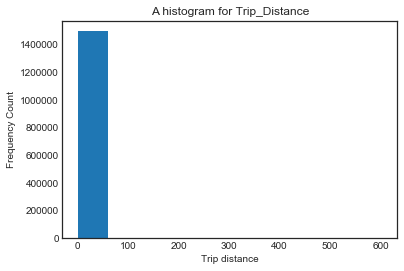

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
plt.hist(df['Trip_distance'])
plt.rcParams['figure.figsize'] = (6, 7)
plt.xlabel("Trip distance")
plt.ylabel("Frequency Count")
plt.title("A histogram for Trip_Distance")


It can be clearly seen that there is a problem with the maximum value in the Trip_distance column. Because of one value histogram bin is supposed to be adjusted
Some more statistics to ensure we come at the right conclusion, values shown below strenthens the fact that a trip distance that large is indeed an outlier

In [7]:
print('Max of the Trip distance values',df['Trip_distance'].max())
print('Min of the Trip distance values',df['Trip_distance'].min())
print('Median of the Trip distance values',df['Trip_distance'].median())

Max of the Trip distance values 603.1
Min of the Trip distance values 0.0
Median of the Trip distance values 1.98


Evaluation of the 99th percentile value to get the sense of spread of the data


In [8]:
k=np.asarray(df['Trip_distance'])
p=(np.percentile(k,99))
print('The 99th percetile value for Trip Distance is',p)

The 99th percetile value for Trip Distance is 14.77


### 1st part of the question


This validates our assumption that there was outlier value of 603.1


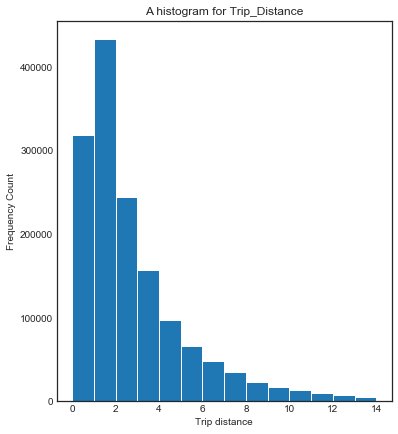

In [9]:
plt.hist(df['Trip_distance'],bins=np.arange(0,p,1),edgecolor='white')\
##p is this value print (np.percentile(k,99))	
plt.xlabel("Trip distance")
plt.ylabel("Frequency Count")
plt.title("A histogram for Trip_Distance")
plt.rcParams['figure.figsize'] = (7,5)


### 2nd part of the question

Hypothesis about the shape:

Mean to the right of the median, long tail on the right.

The above distribution is skewed to the right.

When one has very skewed data, it is better to use the median as measure of central tendency since the median is not much affected by extreme values.

## Question 3

·         Report mean and median trip distance grouped by hour of day.

·         We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fare, and any other interesting characteristics of these trips.



In [10]:
##this analysis requires the use of following library
import datetime
from datetime import datetime

I converted the dtype of the Pick-up column to datetime, which in turn enabled me to extract hour from the particular column

In [11]:
timedata=pd.DataFrame(index=df.index, columns=['Hour','timestamp'])
timedata['timestamp'] = pd.to_datetime(df['lpep_pickup_datetime'])
timedata['Hour']= timedata.timestamp.dt.hour
#timedata['timestamp'].dtypes
#print('The Hour data column has been generated\n',timedata['Hour'])

### 1st part of the question


In [12]:
print('Median of the Trip distance values grouped by hour of day :',df['Trip_distance'].groupby(timedata['Hour']).median())

Median of the Trip distance values grouped by hour of day : Hour
0     2.20
1     2.12
2     2.14
3     2.20
4     2.36
5     2.90
6     2.84
7     2.17
8     1.98
9     1.96
10    1.92
11    1.88
12    1.89
13    1.84
14    1.83
15    1.81
16    1.80
17    1.78
18    1.80
19    1.85
20    1.90
21    2.03
22    2.20
23    2.22
Name: Trip_distance, dtype: float64


In [13]:
print('Mean of the Trip distance values grouped by hour of day :',df['Trip_distance'].groupby(timedata['Hour']).mean())


Mean of the Trip distance values grouped by hour of day : Hour
0     3.115276
1     3.017347
2     3.046176
3     3.212945
4     3.526555
5     4.133474
6     4.055149
7     3.284394
8     3.048450
9     2.999105
10    2.944482
11    2.912015
12    2.903065
13    2.878294
14    2.864304
15    2.857040
16    2.779852
17    2.679114
18    2.653222
19    2.715597
20    2.777052
21    2.999189
22    3.185394
23    3.191538
Name: Trip_distance, dtype: float64


### 2nd part of the question


I selected JFK airport for my analysis, created a separate dataset for JFK cordoned Latitude-Longitudes. I will get a separate dataset which explains the operation of green cab along JFK

For analysis purpose we will not make changes in df instead we will carry out analysis in copied dataframe

So that there is no change in our original dataset

In [14]:
df1=df

There are some outliers in the data as the Lat-Long values do not accurately represent NYC.

I collected the threshhold values from the internet

Data Cleaning for Longitudes and latitudes, so that they correctly represent the map of New York


In [15]:
##For pick up
df1 = df1[df1.Pickup_longitude <= -73.60] 
df1 = df1[df1.Pickup_longitude >= -74.30]
df1 = df1[df1.Pickup_latitude <= 41]
df1 = df1[df1.Pickup_latitude >= 40.5]

In [16]:
##For drop off latitudes
df1 = df1[df1.Dropoff_longitude <= -73.60] 
df1 = df1[df1.Dropoff_longitude >= -74.30]
df1 = df1[df1.Dropoff_latitude <= 41]
df1 = df1[df1.Dropoff_latitude >= 40.5]

Considering JFK airport

One of the resources I used to extract coordinates of JFK

#### https://www.findlatitudeandlongitude.com/?loc=John+F+Kennedy+International+Airport(JFK)%252C+Queens%252C+NY+11422%252C+USA#.WpHaIqjwY2x


In [17]:
##Range for lattitudes and longitudes for JFK airport
JFK_df=df1[((df1.Dropoff_longitude >= -73.80)&(df1.Dropoff_latitude <= 40.66)&
		   (df1.Dropoff_longitude <= -73.77)&(df1.Dropoff_latitude >= 40.64))^
           ((df1.Pickup_longitude >= -73.80)&(df1.Pickup_longitude <= -73.77)&
			(df1.Pickup_latitude >= 40.64)&(df1.Pickup_latitude <= 40.66))]

In [18]:
print('The number of New Yorkers borading or dropping the green cab from JFK Airport are :'
	  ,JFK_df.shape[0])

The number of New Yorkers borading or dropping the green cab from JFK Airport are : 12837


I wanted to visualize the number of new yorkers visiting JFK airport

For visualization I will superimpose the values of (pick up long lat) and (drop off long lat) over the map of NYC

I have taken the codes from the following blog to plot the map of New York

#### http://blog.yhat.com/posts/interactive-geospatial-analysis.html

Basic Interactive Geospatial Analysis in Python

Dividing demographics into five boroughs according to their latitudes and longitudes value



In [19]:
##Basic libraries for Geospatial Analysis
from datetime import datetime
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (10.0, 10.0)


Loading the Borough_Boundaries dataframe,downloaded from (please use the shapefile only)

https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile

Please note that without downloading this file and without adding the local address of the file to your filepath (see below), codes will not run


Text(0.5,1,'NYC Borough Division Map with Lat-Long')

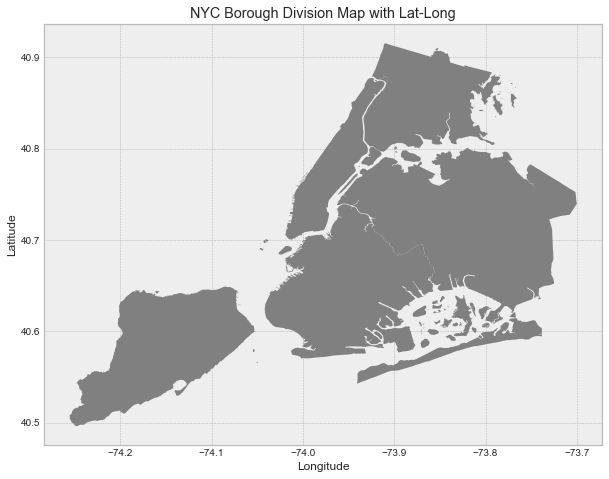

In [20]:
file_path='C:\Borough_Boundaries\geo_export_c9a3cfcf-fe4c-4473-b935-6bd2c109c29f.shp'
gdf = gpd.GeoDataFrame.from_file(file_path)
gdf.head()
gdf.plot(color='grey')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Borough Division Map with Lat-Long')

Now super imposing the JFK traffic over the existing map

Text(63,0.5,'Dropoff_latitude')

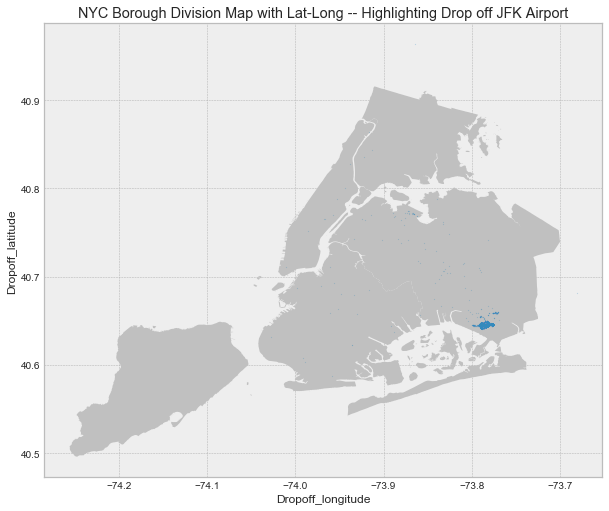

In [21]:
gdf.plot(color='silver')
plt.title('NYC Borough Division Map with Lat-Long -- Highlighting Drop off JFK Airport')
plt.scatter(x=JFK_df["Dropoff_longitude"], y=JFK_df["Dropoff_latitude"],alpha=0.2,s=0.5)
plt.xlabel('Dropoff_longitude')
plt.ylabel('Dropoff_latitude')

Please keep in mind that this map not only represents all the New Yorkers that got off at the Airport, but also who boarded from the airport and got off somewhere else

Text(63,0.5,'Pickup_latitude')

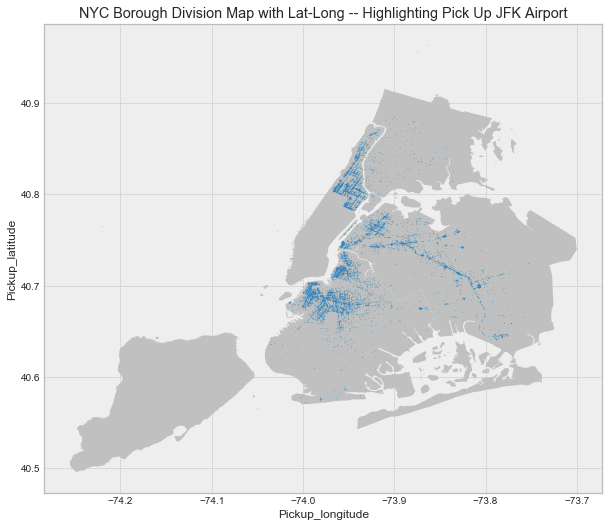

In [22]:
##Something which is really interesting
gdf.plot(color='silver')
plt.title('NYC Borough Division Map with Lat-Long -- Highlighting Pick Up JFK Airport')
plt.scatter(x=JFK_df["Pickup_longitude"], y=JFK_df["Pickup_latitude"],alpha=0.2,s=0.5)
plt.xlabel('Pickup_longitude')
plt.ylabel('Pickup_latitude')

Please keep in mind that this map not only represents all the New Yorkers that get picked up at the Airport, but also who boarded the cab from somewhere else to go the airport.

### 2nd part of the question


In [23]:
print('The mean value for the fair amount when people travel to and fro from JFK\n',
      JFK_df['Fare_amount'].mean())

The mean value for the fair amount when people travel to and fro from JFK
 41.41200436238997


#### Something which is really interesting 

A large proportion of New Yorkers who book a green cab for JFK Airport are from:-

1) Upper East Manhatten

2) Brooklyn

3) Queens

Very less people book it from Staten Island or Bronx region

Also there very less people who book a green cab from the airport to get to their home, a trend contrary to the fact that many people book the cab to get the airport

## Question 4

·         Build a derived variable for tip as a percentage of the total fare.

·         Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). We will validate a sample.

##### Building a predictive model

As mentioned above, for analysis purpose we will not make changes in df instead we will carry out analysis in copied dataframe
so that there is no change in our original dataset

In [24]:
df1['Tip_percentage']=((df1['Tip_amount']/df1['Total_amount'])*100)

In [25]:
df1['Tip_percentage'].isnull().sum()

3975

Reason:- 

Tip as a percentage becomes infinity, when Total_amount is 0 and hence tip amount becomes undefined. The prime reason behind null values in 'Tip percentage column'

In [26]:
df1 = df1[df1.Total_amount>0]

I will be doing some Exploratory Data Analysis, this allows me to narrow down the number of predictors I will be using in the Analysis.

For Lat-Long positions to be considered in the analysis, following Idea was taken from :-
#### https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878


Again,

Basic Interactive Geospatial Analysis in Python

Dividing demographics into five boroughs according to their latitudes and longitudes value

I am trying to predict whether or not lat-long plays an important role in the prediction of Tip amount


In [27]:
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (10.0, 10.0)

Text(63,0.5,'Pickup_latitude')

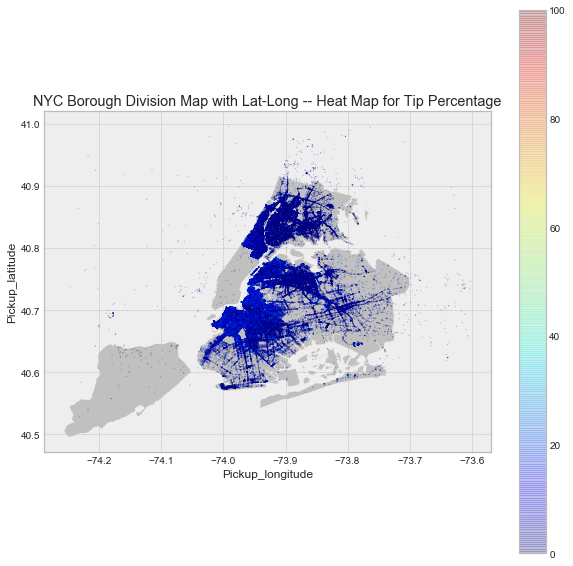

In [28]:
##Codes are similar as above,here I will be including a heat map as well

gdf.plot(color='silver')
plt.title('NYC Borough Division Map with Lat-Long -- Heat Map for Tip Percentage')


plt.scatter(x=df1["Pickup_longitude"], y=df1["Pickup_latitude"],alpha=0.2,
    c=df1["Tip_percentage"], cmap=plt.get_cmap("jet"),s=0.5)
plt.colorbar()
plt.xlabel('Pickup_longitude')
plt.ylabel('Pickup_latitude')

Text(63,0.5,'Dropoff_latitude')

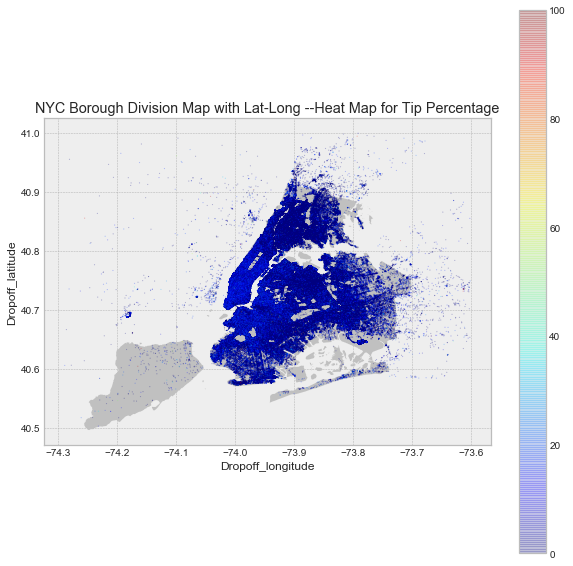

In [29]:
##Another heat map for drop_off latitudes and longitudes
gdf.plot(color='silver')
plt.title('NYC Borough Division Map with Lat-Long --Heat Map for Tip Percentage')
plt.scatter(x=df1["Dropoff_longitude"], y=df1["Dropoff_latitude"],alpha=0.2,
    c=df1["Tip_percentage"], cmap=plt.get_cmap("jet"),s=0.5)
plt.colorbar()
plt.xlabel('Dropoff_longitude')
plt.ylabel('Dropoff_latitude')

#### Heat Map Inference :-

From the graph it is clear that usually tips as a percentage of total amount is correlated to the boroughs. It is a known fact that upper east side of NYC hosts a lot of rich people, so they pay higher ratios of tips as compared to other boroughs.

One can witness the dark shades of blue in those areas

Hence we will keep boroughs['Bronx','Queens'] as a separate region and Other three['Manhatten','Brooklyn','Staten Island'] in the analysis


In [30]:
##Appending the same into original dataset
Boroughs=pd.DataFrame(index=df.index, columns=['Boroughs'])##For the \n
##Lat-Long positions
for i in range(df.shape[0]):
	if df.loc[i,'Pickup_latitude']<40.8 and df.loc[i,'Pickup_longitude']<-73.9:
        ##Values were picked from the plot
		Boroughs.loc[i,'Boroughs']=0## ['Manhatten','Brooklyn','Staten Island']
	else:
		Boroughs.loc[i,'Boroughs']=1##['Bronx','Queens']
df=pd.concat([df,Boroughs],ignore_index=False,axis=1)


Similar attribute I was unsure about was Pick up and drop off time variable.

For the time interval attributes, from my own experience the ride time is fairly important.

Ride time is the difference between pick up and drop off time
Following EDA has been performed to cope up with that.

In [31]:
##As above, here converted the data type to datetime variable and found minute of ride travel time
timediff=pd.DataFrame(index=df.index, columns=['diff','time1','time2'])
timediff['time1'] = pd.to_datetime(df['lpep_pickup_datetime'])
timediff['time2'] = pd.to_datetime(df['Lpep_dropoff_datetime'])
timediff['diff']= pd.to_timedelta(timediff['time2'] -timediff['time1'])##in minutes
second_col = timediff['diff'].dt.seconds
min_col=second_col/60

count    1.494926e+06
mean     2.026263e+01
std      9.690527e+01
min      0.000000e+00
25%      6.183333e+00
50%      1.043333e+01
75%      1.726667e+01
max      1.439900e+03
Name: diff, dtype: float64

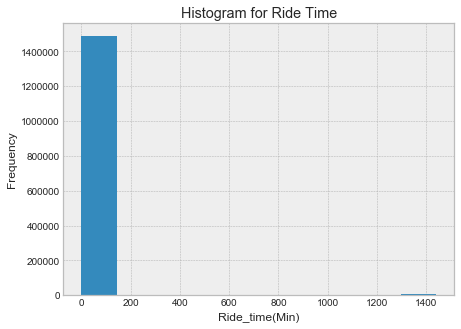

In [32]:
plt.rcParams['figure.figsize'] = (7,5)
plt.hist(min_col)##Some Outliers distort the histogram
plt.title('Histogram for Ride Time')
plt.xlabel('Ride_time(Min)')
plt.ylabel('Frequency')
min_col.describe()##As can be seen majority of the data lies between 0-50

Text(0,0.5,'Frequency')

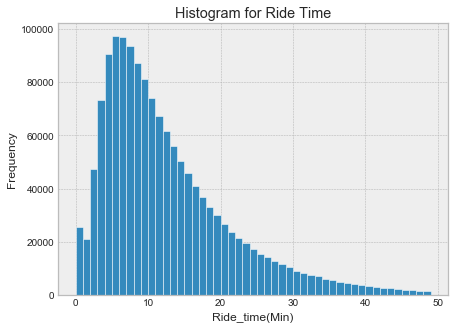

In [33]:
plt.hist(min_col,bins=np.arange(0,50,1),edgecolor='white')
plt.title('Histogram for Ride Time')
plt.xlabel('Ride_time(Min)')
plt.ylabel('Frequency')

To check the correlation between Ride time and Tip percentage(Tip amount), I have plotted the following scatterplot

Text(0.5,1,'Relationship between Ride time vs Tip Amount')

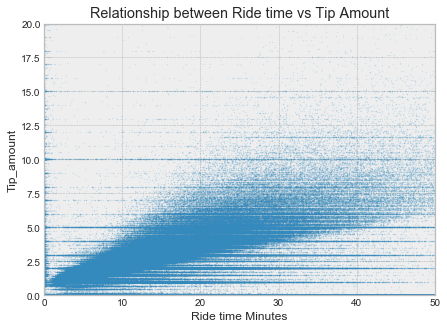

In [34]:
plt.scatter(x=min_col,y=df["Tip_amount"],alpha=0.1 ,s=1)
plt.xlim(0,50)
plt.ylim(0,20)
plt.ylabel('Tip_amount')
plt.xlabel('Ride time Minutes')
plt.title('Relationship between Ride time vs Tip Amount')

There seems to be a trend, hence this transformed variable will be included in the analysis.

In [35]:
##Appending the columns to the dataframe
##For the ride time
df['Ride_time_in_min']=min_col

In [36]:
##Since many scikit learn methods will not accept string values 
##The following values should be converted to numeric
cat_map = {'Y':1, 'N':2}     
df['Store_and_fwd_flag']=df['Store_and_fwd_flag'].map(cat_map)

###### Before creating a metadata we can drop certain variable from the dataframe
1) Vendor ID - It is just an ID.
2) improvement_surcharge - Same value for all the variable 

In [37]:
df[df.MTA_tax==0.5].shape[0]
df[df.MTA_tax==0.5].shape[0]/df.shape[0]
#3) MTA_tax - As seen above 97.5% are same 
df.drop(['VendorID','improvement_surcharge','MTA_tax'],axis=1,inplace=True)


NOTE: -

The dataset is big enough my initial trial failed to load the entire dataset,
hence I will be partitioning the dataset using Random Sampling

In [38]:
new_df=df.sample(frac=1/9,random_state=22)
#new_df.columns
#new_df[new_df.Total_amount==0].count()
#new_df.shape[1]
#new_df.isnull().sum()

## Data Dictionary 
Data Dictionary Online Available for the dataset: -

http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf

Although there is no lower limit provided in the dataset for the interval attribute

Some of the interval targets should be non negative, hence the lower limit has been set to zero

Since there are only 20 odd columns in the dataset we create a metadata instead of drafting one
#### Attribute Map:  the key is the name in the DataFrame

The first number of 0=Interval, 1=Binary, 2=Nominal.

The 1st tuple for interval attributes is their lower and upper bounds

The 1st tuple for categorical attributes is their allowed categories

The 2nd tuple contains the number missing and number of outliers

Metadata summary: [#=0,1,2, Tuple of limits or categories, Tuple of Number Missing and Outliers]

Defining an attribute map

For categorical data it is available on the internet

In [39]:
attribute_map = {
    'Store_and_fwd_flag':[1,(1,2),[0,0]],
    'Passenger_count':[0,(1,10),[0,0]],
    ##Passenger min count should be 1 and according to the data maximum value can be 10
    'Trip_distance':[0,(0,df['Trip_distance'].mean()+3*np.std(df['Trip_distance'])),[0,0]],
    'RateCodeID':[2,(1,2,3,4,5,6),[0,0]],
    'Payment_type':[2,(1,2,3,4,5),[0,0]],
    ##Although in the dictionary it is mentioned that there can be 6 modes of payment but in the actual data there are only 5
    'Fare_amount':[0,(0,df['Fare_amount'].mean()+3*np.std(df['Fare_amount'])),[0,0]],
    'Extra':[1,(0.5,1),[0,0]],
    'Tolls_amount':[0,(0,df['Tolls_amount'].mean()+3*np.std(df['Tolls_amount'])),[0,0]],
    'Tip_amount':[0,(0,df['Tip_amount'].mean()+3*np.std(df['Tip_amount'])),[0,0]],
    'Total_amount':[0,(2.5,df['Total_amount'].mean()+3*np.std(df['Total_amount'])),[0,0]],
    ##The lower limit for Total values has been taken 2.5, this will be explained later
    'Ride_time_in_min':[0,(2,df['Ride_time_in_min'].mean()+3*np.std(df['Ride_time_in_min'])),[0,0]],
    ##Keeping minimum ride time to be two minutes
	'Trip_type ':[1,(1,2),[0,0]],
	'Boroughs':[1,(0,1),[0,0]]}

In [40]:
##Data Preprocessing Starts
feature_names=np.asarray(new_df.columns)
initial_missing=new_df.isnull().sum()
print('The number of observation in the new dataset are :-',new_df.shape[0])
#new_df.describe()
# Initialize number missing in attribute_map
for k,v in attribute_map.items():
    for feature in feature_names:
        if feature==k:
            v[2][0] = initial_missing[feature]
            break

The number of observation in the new dataset are :- 166103


In [41]:
#Initializing outliers and setting all outliers as missing value
for i in (new_df.index):
    # For each observations, Iterate over all attributes.
    # k is the attributes name and v is its metadata
    for k, v in attribute_map.items():
        # Check if the data is missing
             
        if v[0]==0: # Interval Attribute
            l_limit = v[1][0] # get lower limit from metadata
            u_limit = v[1][1] # get upper limit from metadata
            # If the observation is outside the limits, its an outlier
            if new_df.loc[i, k]>u_limit or new_df.loc[i,k]<l_limit:
                v[2][1] += 1        # Number of outliers in metadata
                new_df.loc[i,k] = None  # Set outlier to missing
                
        else: # Categorical Attribute or Other
            
            in_cat = False
            # Iterate over the allowed categories for this attribute
            for cat in v[1]:
                if new_df.loc[i,k]==cat: # Found the category, not outlier
                    in_cat=True
            if in_cat==False:  # Did not find this category in the metadata
                new_df.loc[i,k] = None  # This data is not recognized, its an outlier
                v[2][1] += 1        # Increment the outlier counter for this attribute


In [42]:
print("\nNumber of missing values and outliers by attribute:")
feature_names = np.array(new_df.columns.values)
for k,v in attribute_map.items():
    print(k+":\t%i missing" %v[2][0]+ "  %i outlier(s)" %v[2][1])


Number of missing values and outliers by attribute:
Store_and_fwd_flag:	0 missing  0 outlier(s)
Passenger_count:	0 missing  50 outlier(s)
Trip_distance:	0 missing  3244 outlier(s)
RateCodeID:	0 missing  1 outlier(s)
Payment_type:	0 missing  0 outlier(s)
Fare_amount:	0 missing  2911 outlier(s)
Extra:	0 missing  75952 outlier(s)
Tolls_amount:	0 missing  3446 outlier(s)
Tip_amount:	0 missing  2079 outlier(s)
Total_amount:	0 missing  3591 outlier(s)
Ride_time_in_min:	0 missing  6061 outlier(s)
Trip_type :	0 missing  0 outlier(s)
Boroughs:	0 missing  0 outlier(s)


In [43]:
# Each of these lists will contain the names of the attributes in their level
interval_attributes = []
nominal_attributes  = []
binary_attributes   = []
onehot_attributes   = []
# Iterate over the data dictionary
for k,v in attribute_map.items():
    if v[0]==0:
        interval_attributes.append(k)
    else:
        if v[0]==1:
            binary_attributes.append(k)
        else:
            nominal_attributes.append(k)
            for i in range(len(v[1])):
                str = k+("%i" %i)
                onehot_attributes.append(str)


In [44]:
n_interval = len(interval_attributes)
n_binary   = len(binary_attributes)
n_nominal  = len(nominal_attributes)
n_onehot   = len(onehot_attributes)
print("\nFound %i Interval Attributes, " %n_interval, \
      "%i Binary," %n_binary,  \
      "and %i Nominal Attribute\n" %n_nominal)


Found 7 Interval Attributes,  4 Binary, and 2 Nominal Attribute



In [45]:

##Filling missing values, Imputation of the dataframe
# Assigning the nominal and binary data from the dataframe into a numpy array
from sklearn import preprocessing
#print("Original DataFrame:\n", df[0:5])
# Assigning the interval data from the dataframe into a numpy array
interval_data = new_df.as_matrix(columns=interval_attributes)
# Creating the Imputer for the Interval Data
interval_imputer = preprocessing.Imputer(strategy='mean')
# Imputing the missing values in the Interval data
imputed_interval_data = interval_imputer.fit_transform(interval_data)
nominal_data = new_df.as_matrix(columns=nominal_attributes)
binary_data  = new_df.as_matrix(columns=binary_attributes)
# Creating Imputer for Categorical Data
cat_imputer = preprocessing.Imputer(strategy='most_frequent')
# Imputing the missing values in the Categorical Data
imputed_nominal_data = cat_imputer.fit_transform(nominal_data)
imputed_binary_data  = cat_imputer.fit_transform(binary_data)


In [46]:
# Bring Interval and Categorial Data Together
# The Imputed Data
data_array= np.hstack((imputed_interval_data, imputed_binary_data, \
                       imputed_nominal_data))
col = []
for i in range(n_interval):
    col.append(interval_attributes[i])
for i in range(n_binary):
    col.append(binary_attributes[i])
for i in range(n_nominal):
    col.append(nominal_attributes[i])
df_imputed = pd.DataFrame(data_array,columns=col)
#print("\nImputed DataFrame:\n", df_imputed[0:5])
df_imputed.describe()

,Passenger_count,Trip_distance,Fare_amount,Tolls_amount,Tip_amount,Total_amount,Ride_time_in_min,Store_and_fwd_flag,Extra,Trip_type,Boroughs,RateCodeID,Payment_type
count,166103.000000,166103.000000,166103.000000,166103.000000,166103.000000,166103.000000,166103.000000,166103.000000,166103.000000,166103.000000,166103.000000,166103.000000,166103.000000
mean,1.372297,2.712929,11.871282,0.001923,1.076428,14.260568,13.680636,1.994082,0.581853,1.022522,0.427361,1.097560,1.542435
std,1.042444,2.297605,7.497013,0.067468,1.662815,8.537365,11.093268,0.076701,0.185005,0.148375,0.494697,0.606742,0.523259
min,1.000000,0.000000,0.000000,0.000000,0.000000,2.800000,2.000000,1.000000,0.500000,1.000000,0.000000,1.000000,1.000000
25%,1.000000,1.090000,6.500000,0.000000,0.000000,8.300000,6.666667,2.000000,0.500000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.980000,9.500000,0.000000,0.000000,11.800000,11.066667,2.000000,0.500000,1.000000,0.000000,1.000000,2.000000
75%,1.000000,3.570000,15.000000,0.000000,1.960000,17.760000,17.083333,2.000000,0.500000,1.000000,1.000000,1.000000,2.000000
max,9.000000,12.190000,42.500000,2.540000,8.510000,49.610000,308.983333,2.000000,1.000000,2.000000,1.000000,6.000000,5.000000


In [47]:
##Nominal Attributes
##Creating an instance of the OneHotEncoder & Selecting Attributes
onehot = preprocessing.OneHotEncoder()
hot_array = onehot.fit_transform(imputed_nominal_data).toarray()

In [48]:
# I have not scaled the interval data as the range for interval attributes is not that big.
# The Imputed and Encoded Data

data_array = np.hstack((imputed_interval_data, imputed_binary_data, hot_array))
#col = (interval_attributes, cat_attributes)
col = []
for i in range(n_interval):
    col.append(interval_attributes[i])
for i in range(n_binary):
    col.append(binary_attributes[i])
for i in range(n_onehot):
    col.append(onehot_attributes[i])
new_df_imputed_scaled = pd.DataFrame(data_array,columns=col)
new_df_imputed_scaled.columns


Index(['Passenger_count', 'Trip_distance', 'Fare_amount', 'Tolls_amount',
       'Tip_amount', 'Total_amount', 'Ride_time_in_min', 'Store_and_fwd_flag',
       'Extra', 'Trip_type ', 'Boroughs', 'RateCodeID0', 'RateCodeID1',
       'RateCodeID2', 'RateCodeID3', 'RateCodeID4', 'RateCodeID5',
       'Payment_type0', 'Payment_type1', 'Payment_type2', 'Payment_type3',
       'Payment_type4'],
      dtype='object')

In [49]:
##To avoid multi-correlation  1 variable will be dropped from RateCodeID and Payment_type
new_df_imputed_scaled.drop(['RateCodeID0', 'Payment_type0'], axis=1,inplace=True)
#new_df_imputed_scaled.describe()new_df_imputed_scaled.describe()

Please note that if one plans to validate a sample on my regression model, all the aforementioned steps are supposed to be followed to transform the data.

### Linear Regression ###

In [50]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report 
from sklearn.metrics import roc_curve, auc

In [51]:
print("\n********** Linear Regression ************")
print("****** Predicting Tip as a percentage of total amount *******")


********** Linear Regression ************
****** Predicting Tip as a percentage of total amount *******


#### Problem Encountered

The problem I encountered while doing linear regression was that, whenever in the data, Total_amount is equivalent to 0

Tip amount as a percentage of total amount, this value reaches infinity and hence regression cannot be performed.

Therefore, I searched on the internet the least amount for a green cab in NYC and changed accordingly in my data dictionary

###### http://www.nyc.gov/html/tlc/html/passenger/taxicab_rate.shtml

Since the minimum rate is $2.5, I changed the amount accordingly in the dictionary

I also referred  
https://github.com/cs109/a-2017/blob/master/Lectures/Lecture4-IntroRegression/Lecture4_Notebook.ipynb

### 1st part of the question


In [52]:
new_df_imputed_scaled['Tip_percentage']=(new_df_imputed_scaled['Tip_amount']/new_df_imputed_scaled['Total_amount'])*100

### 2nd part of the question


In [53]:
target = np.asarray(new_df_imputed_scaled['Tip_percentage'])
X = np.asarray(new_df_imputed_scaled.drop(['Total_amount','Tip_amount','Tip_percentage'], axis=1))
cols=(new_df_imputed_scaled.drop(['Total_amount','Tip_amount','Tip_percentage'], axis=1)).columns##This will be used later to print coefficients for all the columns

##Creating a target variable and predictor space

In [55]:
##Splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_validate, target_train, target_validate = \
train_test_split(X,target,test_size = 0.3, random_state=7)
##Performing Linear Regression
lr = LinearRegression()
lr.fit(X_train, target_train)

print('The estimated interceplt of the regression line is: {}'.format(lr.intercept_))
for i in range(X_train.shape[1]):
            print('The coefficient for the variable --{:.<23s}{:15.4f}\n'.format(cols[i], lr.coef_[i]))


The estimated interceplt of the regression line is: 15.278208239496621
The coefficient for the variable --Passenger_count........         0.0186

The coefficient for the variable --Trip_distance..........         0.0690

The coefficient for the variable --Fare_amount............        -0.0563

The coefficient for the variable --Tolls_amount...........         0.6673

The coefficient for the variable --Ride_time_in_min.......        -0.0115

The coefficient for the variable --Store_and_fwd_flag.....         0.1915

The coefficient for the variable --Extra..................        -0.0860

The coefficient for the variable --Trip_type .............        -0.8454

The coefficient for the variable --Boroughs...............        -0.8726

The coefficient for the variable --RateCodeID1............         0.0813

The coefficient for the variable --RateCodeID2............        -1.8413

The coefficient for the variable --RateCodeID3............        -0.6636

The coefficient for the varia

In [56]:
##Defining a function for display of metrics
def display_split_metrics(lr, Xt, yt, Xv, yv):
        predict_t = lr.predict(Xt)
        predict_v = lr.predict(Xv)
        print("\n")
        print("{:.<23s}{:>15s}{:>15s}".format('Model Metrics', \
                                      'Training', 'Validation'))
        print("{:.<23s}{:15d}{:15d}".format('Observations', \
                                          Xt.shape[0], Xv.shape[0]))
        print("{:.<23s}{:15d}{:15d}".format('Coefficients', \
                                          Xt.shape[1]+1, Xv.shape[1]+1))

        R2t = r2_score(yt, predict_t)
        R2v = r2_score(yv, predict_v)
        print("{:.<23s}{:15.4f}{:15.4f}".format('R-Squared', R2t, R2v))
        print("{:.<23s}{:15.4f}{:15.4f}".format('Mean Absolute Error', \
                      mean_absolute_error(yt,predict_t), \
                      mean_absolute_error(yv,predict_v)))
        print("{:.<23s}{:15.4f}{:15.4f}".format('Median Absolute Error', \
                      median_absolute_error(yt,predict_t), \
                      median_absolute_error(yv,predict_v)))
        print("{:.<23s}{:15.4f}{:15.4f}".format('Avg Squared Error', \
                      mean_squared_error(yt,predict_t), \
                      mean_squared_error(yv,predict_v)))
        print("{:.<23s}{:15.4f}{:15.4f}".format('Square Root ASE', \
                      math.sqrt(mean_squared_error(yt,predict_t)), \
                      math.sqrt(mean_squared_error(yv,predict_v))))


In [57]:
display_split_metrics(lr,X_train,target_train,X_validate,target_validate)




Model Metrics..........       Training     Validation
Observations...........         116272          49831
Coefficients...........             19             19
R-Squared..............         0.6450         0.6482
Mean Absolute Error....         2.9252         2.9299
Median Absolute Error..         0.8450         0.8576
Avg Squared Error......        26.1126        25.9080
Square Root ASE........         5.1101         5.0900



Since the test error and the training error are almost similar, I did not perform K-fold Cross Validation as it would have consumed more time


## Question 5

Choose only one of these options to answer for Question 5. There is no preference as to which one you choose. Please select the question that you feel best suits your particular skills and/or expertise. If you answer more than one, only the first will be scored.

·         Option B: Visualization

o    Can you build a visualization (interactive or static) of the trip data that helps us understand intra- vs. inter-borough traffic? What story does it tell about how New Yorkers use their green taxis?


Visualization: -
#### Resource used :-http://blog.yhat.com/posts/interactive-geospatial-analysis.html

I build a interactive plot through which a sense of inter and intra borough traffic can be visualized.

##### Methodoly Used: -
1) I will split data into five parts namely a) Staten Island b) Manhatten c) Brooklyn d) Bronx e) Queens

2) These datasets will be divided using the exact same strategy that used to derive the JFK dataset

3) After the datasets are divided I will plot the dropoff longitude and dropoff latitude on the NYC Borough Map

4) These maps will show if new yorkers board a green cab from a particular borough, how long they do the travel

5) For interactive plots I will be simulating over the time of the day(hour)

for finding out the coordinates of the borousghs and approximated them accordingly I have used
https://www.findlatitudeandlongitude.com/?loc=John+F+Kennedy+International+Airport+(JFK)%252C+Queens%252C+NY+11422%252C+USA#.WpSbVOjwY2y


##### 1st Dataset


In [58]:
Staten_island=df1[(df1.Pickup_longitude >= -74.30)&(df1.Pickup_longitude <= -74.05)&
			      (df1.Pickup_latitude >= 40.50)&(df1.Pickup_latitude <= 40.65)]
print('The number of new yorkers traveling from Staten Island ',Staten_island.shape[0])				   

The number of new yorkers traveling from Staten Island  100


In [59]:
Staten_island.loc[4966,'Dropoff_longitude']

-74.146461486816406

In [60]:
##To proceed ahead with out analysis we need to have longitudes and latitudes as a PARTICULAR POINT ##
Staten_points=pd.DataFrame(index=Staten_island.index, columns=['Points'])##For the Lat-Long positions


In [61]:
for i in Staten_island.index:
		Staten_points.loc[i,'Points']=Point(Staten_island.loc[i,'Dropoff_longitude'],Staten_island.loc[i,'Dropoff_latitude'])
Staten_island=pd.concat([Staten_island,Staten_points],ignore_index=False,axis=1)
Staten_island['Points'].head() 

4966     POINT (-74.14646148681641 40.59836578369141)
7254     POINT (-74.08341217041014 40.62548446655273)
44566    POINT (-74.15908050537109 40.63452529907227)
45942    POINT (-74.10751342773438 40.61835861206055)
47397    POINT (-74.07749938964845 40.62071228027344)
Name: Points, dtype: object

In [62]:
# check if point(s) fall within known geometry - actual
Staten_island['contains'] = Staten_island['Points'].map(lambda x: True if gdf.contains(x).any()==True else False)
##To simulate this we need the hours 
Staten_island['timestamp']=pd.to_datetime(df['Lpep_dropoff_datetime'])

In [63]:
# plotting stuff
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (10.0, 10.0)

# widget stuff
from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display


In [64]:
def make_plot(hour=1):

    # filter dataframe
    temp = Staten_island[Staten_island['contains']==True]
    temp=temp[temp['timestamp'].dt.hour==hour]

    # plot
    gdf.plot(color='silver')
    plt.xlabel('Dropoff_Longitude')
    plt.ylabel('Dropoff_Latitude')
    plt.title('Interactive plot for Analyzing the inter and intra NYC Borough Division of Traffic--- Pick up from Staten Island')
    plt.scatter(x=temp['Dropoff_longitude'], y=temp['Dropoff_latitude'], s=30)

In [65]:
interact(make_plot, hour=(1, 23, 1))


A Jupyter Widget

<function __main__.make_plot>

#### Analysis of the plot: -

As can be seen above very few new yorkers board the green taxi from Staten Island.

Mostly they travel within the city only, traffic not much dependent upon time.

##### Note: - This plot is not visible in the PDF format of the report, that is why I have attached Screenshot of this plot


##### 2nd Dataset


In [66]:
Bronx=df1[(df1.Pickup_longitude >= -73.93)&(df1.Pickup_longitude <= -73.82)&
		  (df1.Pickup_latitude >= 40.80)&(df1.Pickup_latitude <= 40.92)]
print('The number of new yorkers traveling from Bronx ',Bronx.shape[0])				   

The number of new yorkers traveling from Bronx  92113


In [67]:
Bronx_points=pd.DataFrame(index=Bronx.index, columns=['Points'])##For the Lat-Long positions


In [68]:
for i in Bronx.index:
        Bronx_points.loc[i,'Points']=Point(Bronx.loc[i,'Dropoff_longitude'],Bronx.loc[i,'Dropoff_latitude'])


In [69]:
Bronx=pd.concat([Bronx,Bronx_points],ignore_index=False,axis=1)

In [70]:
#check if point(s) fall within known geometry - actual
Bronx['contains'] = Bronx['Points'].map(lambda x: True if gdf.contains(x).any()==True else False)
##To simulate this we need the hours 
Bronx['timestamp']=pd.to_datetime(Bronx['Lpep_dropoff_datetime'])

In [71]:
def make_plot(hour=1):

    # filter dataframe
    temp = Bronx[Bronx['contains']==True]
    temp=temp[temp['timestamp'].dt.hour==hour]

    # plot
    gdf.plot(color='silver')
    plt.xlabel('Dropoff_Longitude')
    plt.ylabel('Dropoff_Latitude')
    plt.title('Interactive plot for Analyzing the inter and intra NYC Borough Division of Traffic--- Pick up from Bronx')
    plt.scatter(x=temp['Dropoff_longitude'], y=temp['Dropoff_latitude'], s=5)

In [72]:
interact(make_plot, hour=(0, 23, 1))

A Jupyter Widget

<function __main__.make_plot>

#### Analysis of the plot: -
As can be seen, people who live in Bronx usually travel to Manhatten. Also the intra borough traffic is usually heavy. Many people opt to travel by Green cab.
According to the time slider, traffic is minimum 0300 hours and it get dense at around 0800 hours(Office Hours).
These insights can be found for every other boroughs.

I did the analysis for Staten Island and Bronx.

For the other three boroughs, the number of rows are huge. 
It takes longer time to run small chunks of codes.

I have provided the number of people who travels in green cab from these part of NYC, but I have not carried out the same analysis. Further analysis can be performed by using the same codes with higher memory capabilities


##### Note: - This plot is not visible in the PDF format of the report.



##### 3rd Dataset


In [73]:
Brooklyn=df1[(df1.Pickup_longitude >= -74.01)&(df1.Pickup_longitude <= -73.87)&
              (df1.Pickup_latitude >= 40.57)&(df1.Pickup_latitude <= 40.72)]
print('The number of new yorkers traveling from Brooklyn ',Brooklyn.shape[0])				   

The number of new yorkers traveling from Brooklyn  509925


##### 4th Dataset


In [74]:
Manhatten=df1[(df1.Pickup_longitude >= -74.05)&(df1.Pickup_longitude <= -73.93)&
              (df1.Pickup_latitude >= 40.78)&(df1.Pickup_latitude <= 40.90)]
print('The number of new yorkers traveling from Manhatten ',Manhatten.shape[0])				   

The number of new yorkers traveling from Manhatten  413620


##### 5th Dataset


In [75]:
Queens=df1[(df1.Pickup_longitude >= -73.95)&(df1.Pickup_longitude <= -73.70)&
            (df1.Pickup_latitude >= 40.72)&(df1.Pickup_latitude <= 40.79)]
print('The number of new yorkers traveling from Queens ',Queens.shape[0])				  

The number of new yorkers traveling from Queens  382593


As a final check for selection of coordinates I will be summing up the total number of new yorkers who boarded the green cab from different boroughs (should be close enough to 14,00,000)

In [76]:
print('The total number of New Yorkers who use green cabs ',Queens.shape[0]+
      Manhatten.shape[0]+Brooklyn.shape[0]+Bronx.shape[0]+Staten_island.shape[0])

The total number of New Yorkers who use green cabs  1398351


This final check completes my analysis. Thank you for your time.